In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer, Dropout, ZeroPadding2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model

from IPython.display import SVG
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [4]:
print('Number of train data: ' + str(len(X_train)))
print('Number of test data: ' + str(len(X_test)))

Number of train data: 60000
Number of test data: 10000


In [5]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

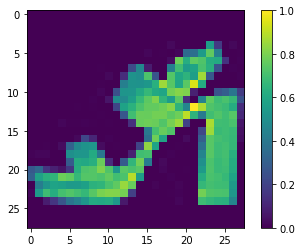

In [6]:
plt.figure()
plt.imshow(X_train[1880])
plt.colorbar()
plt.grid(False)
plt.show()

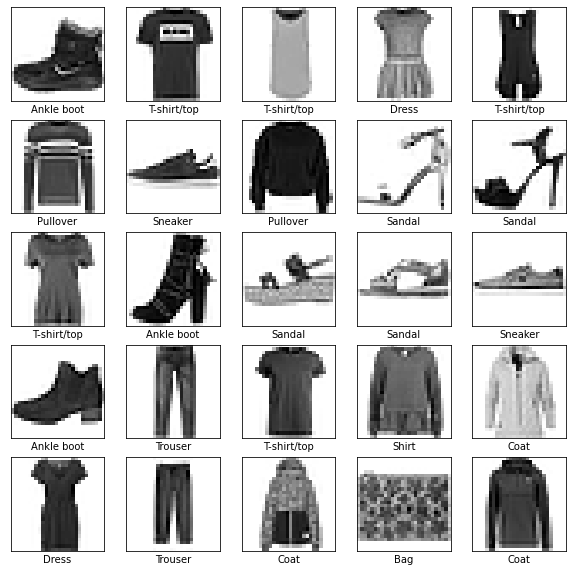

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
plt.savefig('Fashion-MNIST data', dpi=150)
plt.show()

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


2022-01-25 22:31:10.385039: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
# train the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4979 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3710 - accuracy: 0.8650
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3341 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3093 - accuracy: 0.8864
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2932 - accuracy: 0.8927


In [11]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3633 - accuracy: 0.8724
Test accuracy: 0.8723999857902527


In [12]:
# Make prediction
preds = model.predict(X_test)

In [13]:
preds[5]

array([1.1226018e-05, 9.9998510e-01, 1.1346436e-07, 1.6863187e-06,
       1.3274827e-06, 3.3243842e-12, 6.0746396e-07, 2.1002546e-14,
       5.4699205e-09, 4.1410681e-12], dtype=float32)

In [14]:
np.argmax(preds[5])

1

In [15]:
y_test[5]

1

In [16]:
def plot_image(i, preds_array, true_labels, img):
    preds_array, true_labels, img = preds_array[i], true_labels[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    preds_labels = np.argmax(preds_array)

    if preds_labels == true_labels: 
        color = 'blue'
    else: 
        color = 'red'
    
    plt.xlabel('{} {:2.0f}% ({})'.format(labels[preds_labels],
                                        100*np.max(preds_array),
                                        labels[true_labels],
                                        color=color))
    
def plot_value_array(i, preds_array, true_labels):
    preds_array, true_labels = preds_array[i], true_labels[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), preds_array, color='#777777')
    plt.ylim([0,1])
    preds_labels = np.argmax(preds_array)
    
    thisplot[preds_labels].set_color('red')
    thisplot[true_labels].set_color('blue')

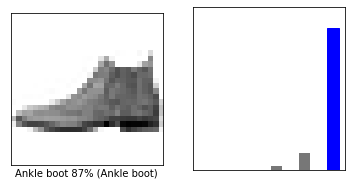

In [17]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, preds, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, preds, y_test)
plt.show()

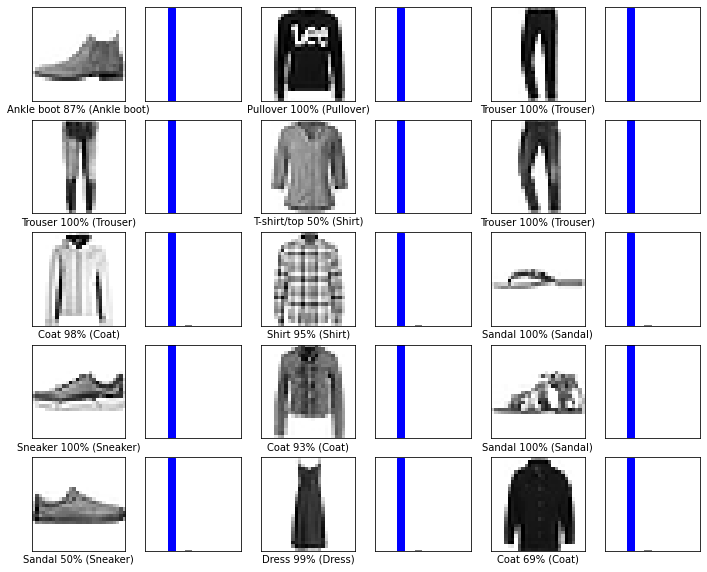

In [18]:
# plot for a few more images
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, preds, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(1, preds, y_test)
plt.show()

In [19]:
# make a prediction for an image in the test set
img = X_test[0]
print(img.shape)

(28, 28)


In [20]:
# add the image to a batch where it is the only member
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [21]:
preds_single = model.predict(img)
print(preds_single)

[[6.2593349e-06 1.7076158e-06 1.9528767e-05 1.2374971e-06 2.2025634e-07
  2.3807120e-02 6.8577363e-05 1.0364521e-01 3.5601531e-04 8.7209421e-01]]


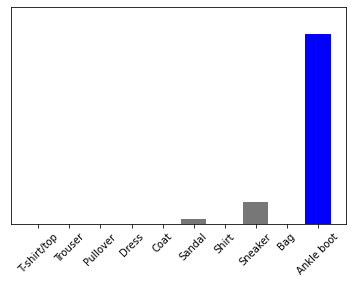

In [22]:
plot_value_array(0, preds_single, y_test)
_ = plt.xticks(range(10), labels, rotation=45)

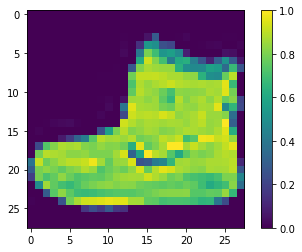

In [23]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
np.argmax(preds_single[0])

9

First attempt, the test accuracy is 0.87 which is not bad. 